In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/201402_trip_data.csv', parse_dates=['start_date', 'end_date'])

In [251]:
backup_df = df.copy()

In [252]:
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [253]:
df['month'] = df['start_date'].dt.month

In [254]:
df['dayofweek'] = df['start_date'].dt.weekday_name
df['date'] = df['start_date'].dt.date
df['hour'] = df['start_date'].dt.hour
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,month,dayofweek,date,hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,8,Thursday,2013-08-29,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,8,Thursday,2013-08-29,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,8,Thursday,2013-08-29,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,8,Thursday,2013-08-29,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,8,Thursday,2013-08-29,12


In [255]:
gb = df.groupby('month').size()

In [256]:
df.month.unique()

array([ 8,  9, 10, 11, 12,  1,  2])

In [257]:
gb.plot(kind='bar')
plt.show()
#why are we missing months: ran out of funding? data outage? 
#Pilot program for 2 months before off
#Data started 8/13 and ends 2/14

TypeError: 'int' object is not callable

In [ ]:
df.head()

In [ ]:
df_month = df[df['month'].isin([9,10,11,12])]
df_month.month.unique()

In [ ]:
gb_day = df_month.groupby('date').size()

In [ ]:
mean = gb_day.mean()
print(mean)

In [ ]:
std = gb_day.std()
print(std)

In [ ]:
mean_plus = round(mean + 1.5*std,2)

In [ ]:
mean_minus = round(mean - 1.5*std,2)
print(mean_plus)
print(mean_minus)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
gb_day.plot(ax=ax).set_ylabel('num of rides per months')
plt.axhline(mean_plus, alpha=0.3, color = 'purple', linewidth=2, linestyle='dashed')
plt.axhline(mean_minus, alpha=0.3, color = 'red', linewidth=2, linestyle='dashed')
plt.axhline(mean, alpha=0.3, color = 'pink', linewidth=10, linestyle='dashed')

plt.show()

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(1,1, figsize=(10,5))
gb_daily = df.groupby('date').size()
gb_daily.hist(normed=True, bins=15)
gb_daily.plot.kde()
plt.show()

In [111]:
df_weekday = df[df['dayofweek'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]
df_weekend = df[df['dayofweek'].isin(['Saturday','Sunday'])]
#df_weekend.dayofweek.unique()
gb_weekday = df_weekday.groupby('date').size()
gb_weekend = df_weekend.groupby('date').size()
gb_weekend.head()

date
2013-08-31    640
2013-09-01    706
2013-09-07    796
2013-09-08    704
2013-09-14    702
dtype: int64

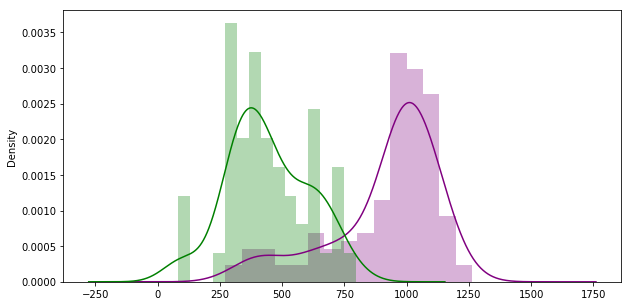

In [116]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
gb_weekday.hist(normed=True, bins=15, alpha = 0.3, color='purple')
gb_weekday.plot.kde(color='purple')
gb_weekend.hist(normed=True, bins=15, alpha = 0.3, color = 'green')
gb_weekend.plot.kde(color='green')
plt.show()

In [161]:
gb_hour_date = df_weekday.groupby(['date','hour']).size().reset_index(name='count')
gb_hour_date.head(30)

,date,hour,count
0,2013-08-29,9,12
1,2013-08-29,10,14
2,2013-08-29,11,42
3,2013-08-29,12,120
4,2013-08-29,13,87
5,2013-08-29,14,50
6,2013-08-29,15,62
7,2013-08-29,16,61
8,2013-08-29,17,88
9,2013-08-29,18,68


In [232]:
grouped = gb_hour_date.groupby('hour')
lst = [grouped.get_group(hour)['count'] for hour in grouped.groups]

{0: Int64Index([  15,   38,   61,   80,  100,  122,  143,  164,  187,  207,
            ...
            2617, 2639, 2662, 2683, 2705, 2728, 2750, 2813, 2836, 2858],
           dtype='int64', length=111), 1: Int64Index([  16,   39,   81,  101,  123,  165,  208,  337,  359,  404,  426,
             448,  470,  537,  560,  606,  628,  671,  694,  715,  760,  783,
             869,  892,  935,  957,  980, 1004, 1048, 1071, 1115, 1137, 1158,
            1181, 1269, 1292, 1313, 1358, 1403, 1426, 1489, 1511, 1534, 1575,
            1617, 1662, 1685, 1707, 1728, 1770, 1792, 1836, 1857, 1897, 1919,
            1942, 1963, 1985, 2005, 2028, 2050, 2074, 2117, 2141, 2163, 2185,
            2207, 2229, 2293, 2317, 2359, 2381, 2403, 2426, 2512, 2532, 2596,
            2640, 2706, 2729, 2751, 2814, 2837],
           dtype='int64'), 2: Int64Index([  17,   40,  166,  230,  293,  314,  360,  382,  492,  514,  561,
             583,  716,  738,  761,  958,  981, 1005, 1049, 1072, 1138, 1159,
            

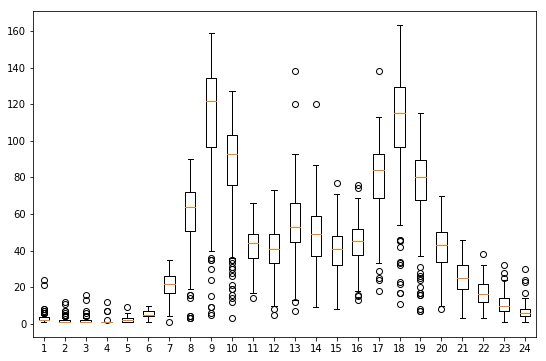

In [233]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot(lst)
#make pretty
plt.show()

In [234]:
gb_weekday_hr = df_weekday.groupby(['date','hour']).size().reset_index(name='count')
gb_weekend_hr = df_weekend.groupby(['date','hour']).size().reset_index(name='count')
grouped_day = gb_weekday_hr.groupby('hour')
lst_day = [grouped_day.get_group(hour)['count'] for hour in grouped_day.groups]
grouped_end = gb_weekend_hr.groupby('hour')
lst_end = [grouped_end.get_group(hour)['count'] for hour in grouped_end.groups]

In [248]:
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(121)
plt.boxplot(lst_day)
ax = fig.add_subplot(122)
plt.boxplot(lst_end)
plt.show()

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable